# <a id="top"></a>  
# Heart Attack: EDA + CORR + ML + ML metrics
---

**Heart Attack Analysis & Prediction Dataset** is a small dataset containing 14 attributes, and is very useful in learning how to prepare data in order to produce meaningful plots and perform to machine learning. This project will cover:

- data preperation
- exploratory data analysis - plots, plots and more plots
- machine learning with classification models
- evaluation metrics for the models

--- 

## Table Of Content

1. [**Data Preparation**](#prep)<br>
      1.1 [Data Cleaning](#prep_null)<br>
      1.2 [Feature Engineering](#prep_feat)<br>
      1.3 [Types of Data (categoric/numeric)](#prep_type)<br>
<br>
2. [**Exploratory Data Analysis**](#eda)<br>
      2.1 [Categorical Data](#eda_cat)<br> 
      2.2 [Numerical Data](#eda_num)<br>
<br>
3.  [**Correlation**](#eda_corr)<br>
<br>  
4. [**Machine Learning - Classification**](#model)<br>
      4.1 [Train/Test Split](#model_split)<br>
      4.2 [Define Classification Models](#model_algo)<br>
<br>
5. [**Classification Model - Evaluation Metrics**](#eval)<br>
      5.1 [Confusion Matrix](#eval_conf)<br>
      5.2 [Accuracy Score](#eval_acc)<br>
      5.3 [Recall and Precision Score](#eval_rp)<br>
      5.4 [F1-Score](#eval_f1)<br>
      5.5 [Receiver Operating Characteristics (ROC) Curve](#eval_roc)<br>
      5.6 [Area Under the Curve (AUC) Score](#eval_auc)<br>
      5.7 [Cross Validation Score](#eval_cv)<br>

   
   
---
**Dataset:**<br>
[**Heart Attack Analysis & Prediction Dataset**](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

**Machine Learning Metrics (scikit):**<br>
[**Metrics and Scoring**](https://scikit-learn.org/stable/modules/model_evaluation.html) - scikit-learn.org model_evaluation

**Other References:**<br>
[**Python Colors**](https://www.kaggle.com/asimislam/python-colors-color-cmap-palette) -  colors, colormaps and palettes notebook<br>
[**Subplot Tutorial**](https://www.kaggle.com/asimislam/tutorial-python-subplots) - notebook on how to create subplots

# 1. Data Preparation
Import Python libraries and load the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#  Kaggle directories
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv("heart.csv")
print(df.head())
print(df.shape)

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
(303, 14)


# 1.1 Data Cleaning 
Check and clean any NULLs or duplicate values in the dataset.

In [2]:
#  check for NULL values
print('\n--- NULL count ---\n{}'.format(df.isnull().sum()))
#df.dropna(inplace=True)             #  drop NULLs

#  check for DUPLICATES
print('\n1st DUPLICATE count:\t{}'.format(df.duplicated().sum()))
print('dropping duplicates')
df.drop_duplicates(inplace = True)  #  drop duplitcates
print('2nd DUPLICATE count:\t{}'.format(df.duplicated().sum()))


--- NULL count ---
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

1st DUPLICATE count:	1
dropping duplicates
2nd DUPLICATE count:	0


# 1.2.1. backup original dataset for machine learning (for ML)

In [3]:
df_ml = df.copy(deep=True)  # backup data for machine learning

# 1.2.2 rename columns for better readability (for EDA)
Rename columns with more descriptive names and values.

In [4]:
#  Rename columns (attributes) for better readability
df.rename(columns={
        'cp':'chest_pain_type', 
        'trtbps':'resting_blood_pressure',
        'chol':'cholesterol',
        'fbs':'fasting_blood_sugar',
        'restecg':'resting_electrocardiographic',
        'thalachh':'maximum_heart_rate',
        'exng':'exercise_induced_angina',
        'oldpeak':'ST_depression',
        'slp':'slope_peak_exercise_ST',
        'caa':'number_of_major_vessels',
        'thall':'thalium_stress_test'},
        inplace=True)

print(df.columns.tolist())

['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiographic', 'maximum_heart_rate', 'exercise_induced_angina', 'ST_depression', 'slope_peak_exercise_ST', 'number_of_major_vessels', 'thalium_stress_test', 'output']


# 1.2.3. reassign feature values for better readability (for EDA)
Update categorical attribute values (features) for better readability & plotting.

In [5]:
#  Update attribute values (features) for better readability & plotting
df['sex'] = df['sex'].map({0:'female', 1:'male'})
df['chest_pain_type'] = df['chest_pain_type'].map({
        0:'typical angina', 1:'atypical angina',
        2:'non-anginal',    3:'asymptomatic'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
        0:'> 120 mg/dl', 1:'< 120 mg/dl'})
df['resting_electrocardiographic'] = df['resting_electrocardiographic'].map({
        0:'normal', 1:'ST-T wave abnormality', 2:'ventricular hypertrophy'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({
        0:'no', 1:'yes'})
df['slope_peak_exercise_ST'] = df['slope_peak_exercise_ST'].map({
        0:'upsloping', 1:'flat', 2:'downsloping'})
df['thalium_stress_test'] = df['thalium_stress_test'].map({
        0:'normal 0',     1:'normal 1',
        2:'fixed defect', 3:'reversable defect'})
df['output'] = df['output'].map({0:'no disease', 1:'disease'})

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thalium_stress_test,output
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


# 1.3 Types of Data (categoric/numeric) 
Following code will separate out catergorical and numerical data. number_of_major_vessels has the most discrete unique values (5)...any column with more than "5" unique values is considered a numeric value.

In [6]:
#  Separate out Categorical and Numeric data
colCAT = []
colNUM = []
for i in df.columns:
    if (len(df[i].unique())) > 5:
        colNUM.append(i)
        print('NUM data:  {}\t{}'.format(len(df[i].unique()),i))
    else:
        colCAT.append(i)
        print('CAT data:  {}\t{}'.format(len(df[i].unique()),i))

NUM data:  41	age
CAT data:  2	sex
CAT data:  4	chest_pain_type
NUM data:  49	resting_blood_pressure
NUM data:  152	cholesterol
CAT data:  2	fasting_blood_sugar
CAT data:  3	resting_electrocardiographic
NUM data:  91	maximum_heart_rate
CAT data:  2	exercise_induced_angina
NUM data:  40	ST_depression
CAT data:  3	slope_peak_exercise_ST
CAT data:  5	number_of_major_vessels
CAT data:  4	thalium_stress_test
CAT data:  2	output


# 2.1 Categorical Data - EDA

# CAT - Overview of Data

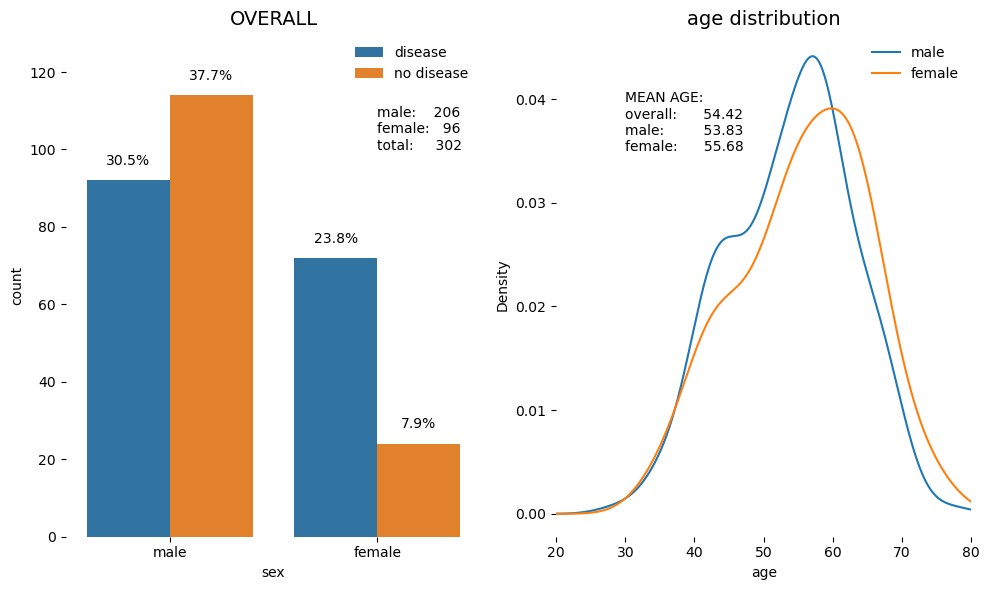

In [7]:
# --- COUNT and DISTRIBUTION plots ---
countM = len(df['age'][df['sex'] == 'male'])    # count of "male"
countF = len(df['age'][df['sex'] == 'female'])  # count of "female"


fig = plt.figure(figsize=(10,6))

plt.subplot(121)   # overall
ax = sns.countplot(data = df, x = 'sex', hue = 'output')
plt.title('OVERALL', fontsize = 14)
plt.ylim([0,130])
plt.legend(loc='upper right', frameon=False)
plt.box(False)
for p in ax.patches:
    ax.annotate("{:,.1f}%".format(p.get_height()*100/len(df)), (p.get_x() + p.get_width()/2, p.get_height()+5), ha='center', va='center')
plt.text(1,100, 'male:    {}\nfemale:   {}\ntotal:     {}'.format(countM,countF,len(df)))

plt.subplot(122)   # age distribution
df['age'][df['sex'] == 'male'].plot(kind = 'kde')
df['age'][df['sex'] == 'female'].plot(kind = 'kde')
plt.title('age distribution', fontsize = 14)
plt.xlabel('age')
plt.legend(('male', 'female'), loc='upper right', frameon=False)
plt.xlim([20,80])
plt.box(False)
# mean age
avg_o = df['age'].mean()
avg_m = df['age'][df['sex'] == 'male'].mean()
avg_f = df['age'][df['sex'] == 'female'].mean()
plt.text(30,.035, 'MEAN AGE:\noverall: {:>10.2f}\nmale:    {:>10.2f}\nfemale: {:>10.2f}'.format(avg_o,avg_m,avg_f))

plt.tight_layout()
plt.show()

#  CAT - Male & Female Data

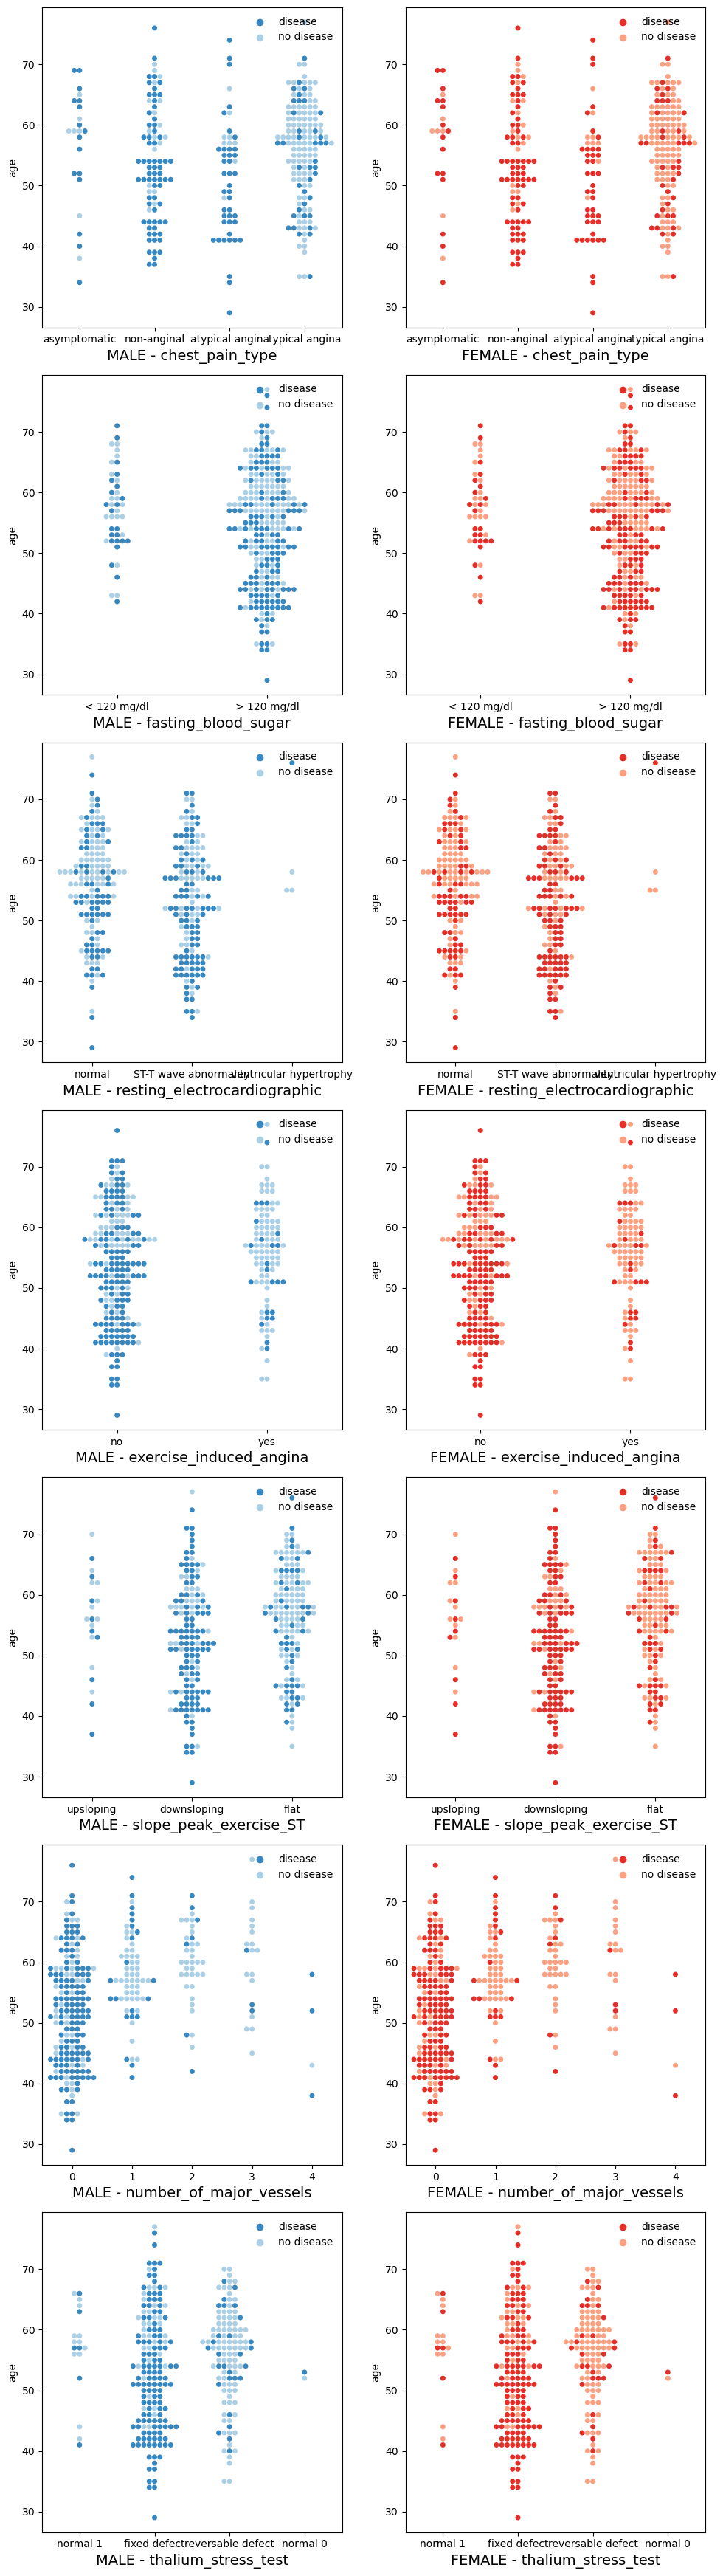

In [8]:
# --- CAT MALE/FEMALE swarmplots ---
a = len(df[colCAT].columns.drop(['sex','output']))
       # number of rows (CAT columns minus sex & output)
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,a*5))

for i in df[colCAT].columns.drop(['sex','output']):
    #  swarmplot - MALE
    fig.add_subplot(a,b,c)
    sns.swarmplot(data = df[df['sex'] == 'male'], x = df[i], y = df.age, hue = df.output, palette = 'Blues_r')
    plt.xlabel('MALE - {}'.format(i), fontsize = 14)
    plt.legend(loc='upper right', frameon=False)
    c = c + 1
    
    #  swarmplot - FEMALE
    fig.add_subplot(a,b,c)
    sns.swarmplot(data = df[df['sex'] == 'female'], x = df[i], y = df.age, hue = df.output, palette = 'Reds_r')
    plt.xlabel('FEMALE - {}'.format(i), fontsize = 14)
    plt.legend(loc='upper right', frameon=False)
    c = c + 1

plt.tight_layout()
plt.show()

# 2.2   Numerical Data - EDA<a id="eda_num"></a>

**Numerical Attributes**
- age
- resting_blood_pressure
- cholestoral
- maximum_heart_rate
- ST_depression
 
 ### NUM - Male/Female Data

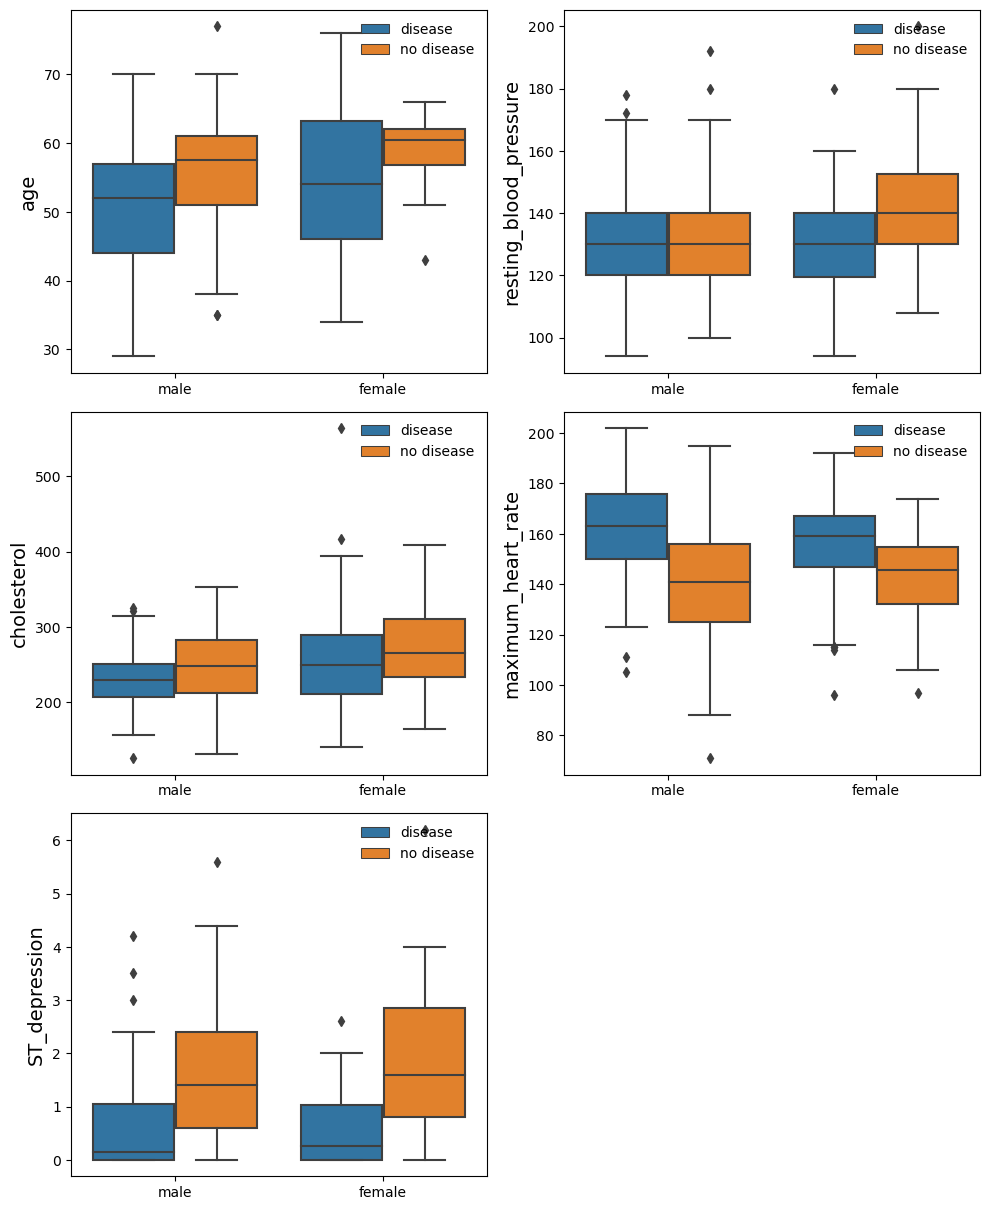

In [9]:
a = len(colNUM)       # number of rows (CAT columns minus sex & output)
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,a*4))

for i in colNUM:
    fig.add_subplot(a,b,c)
    sns.boxplot(x = df['sex'], y = df[i], order = ['male', 'female'], hue = df['output'])
    plt.xlabel("")
    plt.ylabel(i, fontsize = 14)
    plt.legend(loc='upper right', frameon=False)
    c = c + 1

plt.tight_layout()
plt.show()

# OBSERVATIONS:

- **age** - is not a good factor in determining heart health.

- **resting blood pressure** - is not a good factor in determining heart health.

- **cholestoral** - is not a good factor in determining heart health.

- **maximum heart rate** - is a good factor in determining heart health.  Populations with a higher heart rate have a higher rate of heart disease.

- **ST depression** is a good factor in determining heart health.  Populations with a lower ST depression a higher rate of heart disease.

Correlation will give us a better understanding of the relationships between the attributes and heart disease.

# [go to top of document](#top)     

---
# 3   Correlation<a id="eda_corr"></a>
Correlation is a statistical tool used to establish the relationship between two or more variables.  The correlation coefficient is usually ranges from -1 to +1, with 1 being strong correlation, -1 being strong inverse correlation and 0 being no correlation.

   *  **Correlation OVERALL** - heatmap & barplot
   *  **Correlation MALE**    - heatmap & barplot
   *  **Correlation FEMALE**  - heatmap & barplot
   
**Heatmaps** are a great way of representing correlation visually.  However, due to the amount of attributes in the dataframe, it looks very cluttered.  That's why the **barchart** with the correlations sorted has been added.

Start with the original dataset (**copy df = df_ml**)

In [10]:
df = df_ml.copy(deep=True)   #  update df with original data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


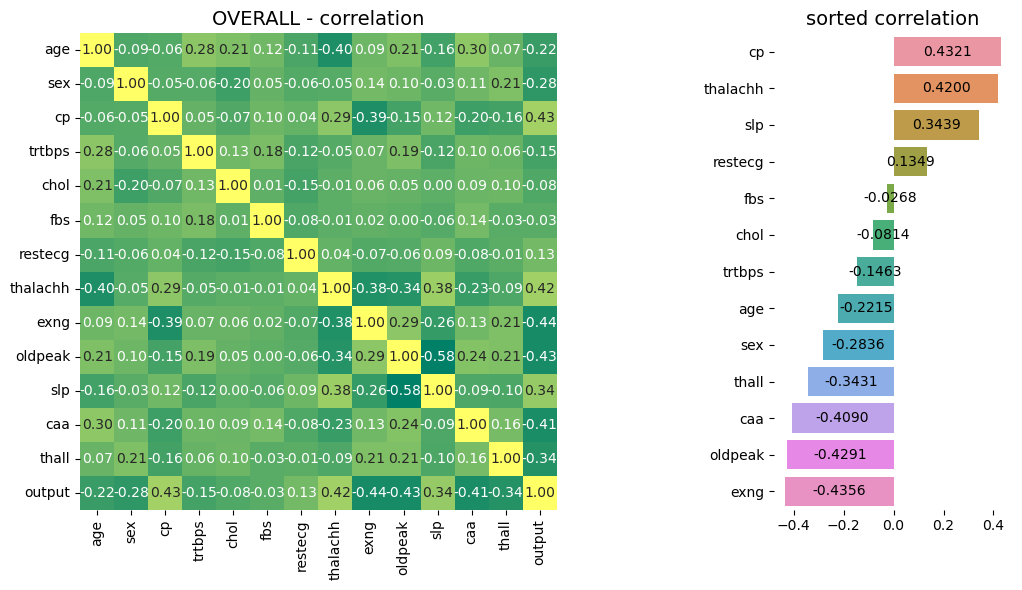

In [11]:
# CORRELATION
dataCorr = df.corr()

#  Correlation TABLE
corrALL = dataCorr['output'].sort_values(ascending=False)
corrALL = corrALL.drop(['output'])


#  plot correlation heatmap and barchart
from matplotlib import gridspec

fig = plt.figure(figsize=(12,6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 

ax0 = plt.subplot(gs[0])
sns.heatmap(dataCorr, annot = True, fmt='.2f', square = True, cbar = False, ax = ax0, cmap ='summer')
plt.title('OVERALL - correlation', fontsize=14)

ax1 = plt.subplot(gs[1])
sns.barplot(y = corrALL.index, x = corrALL.values, ax = ax1)
plt.title('sorted correlation', fontsize = 14)
for p in ax1.patches:
    ax1.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width()/2, p.get_y()+.4), ha='center', va='center')
plt.box(False)

plt.tight_layout()
plt.show()

# **Overall - correlation:**
- chest_pain_type, maximum_heart_rate and slope_peak_exercise_ST have strong correlation to heart disease
- number_of_major_vessels, ST_depression and exercise_induced_angina have strong inverse correlation to heart disease

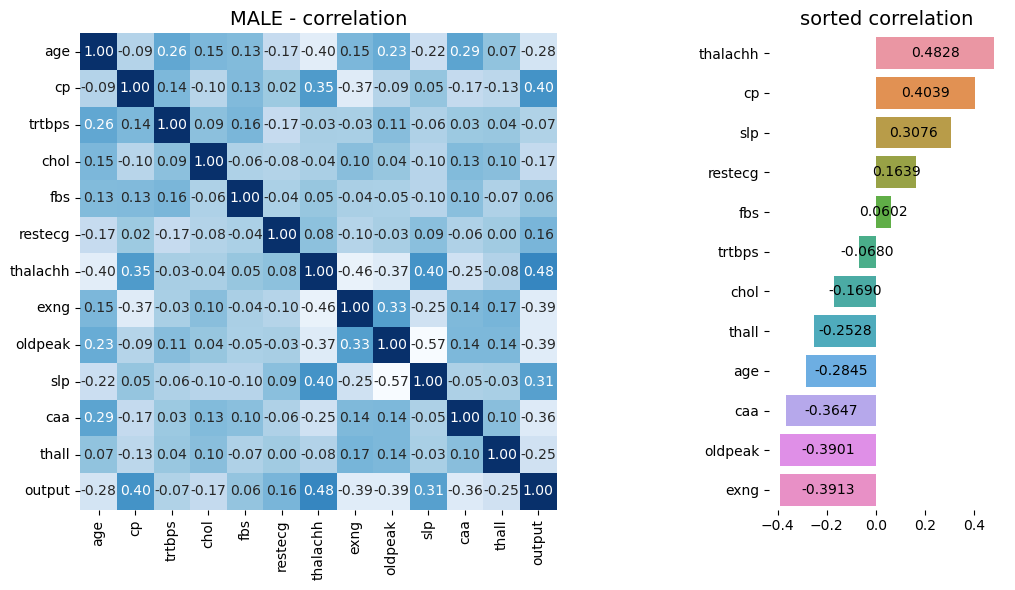

In [12]:
dataCorr_M = df[df['sex'] == 1].corr()
# drop 'sex' from row and column
dataCorr_M = dataCorr_M.drop(['sex'])
dataCorr_M = dataCorr_M.drop(['sex'], axis = 1)


#  Correlation TABLE
corrALL_M = dataCorr_M['output'].sort_values(ascending=False)
corrALL_M = corrALL_M.drop(['output'])


# heatmap and barplot
fig = plt.figure(figsize=(12,6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 

ax0 = plt.subplot(gs[0])
sns.heatmap(dataCorr_M, annot = True, fmt='.2f', square = True, cbar = False, ax = ax0, cmap = 'Blues')
plt.title('MALE - correlation', fontsize=14)

ax1 = plt.subplot(gs[1])
sns.barplot(y = corrALL_M.index, x = corrALL_M.values, ax = ax1)
plt.title('sorted correlation', fontsize = 14)
for p in ax1.patches:
    ax1.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width()/2, p.get_y()+.4), ha='center', va='center')
plt.box(False)

plt.tight_layout()
plt.show()

# **Male - correlation:**
- maximum_heart_rate, chest_pain_type and slope_peak_exercise_ST have strong correlation to heart disease
- number_of_major_vessels, ST_depression and exercise_induced_angina have strong inverse correlation to heart disease

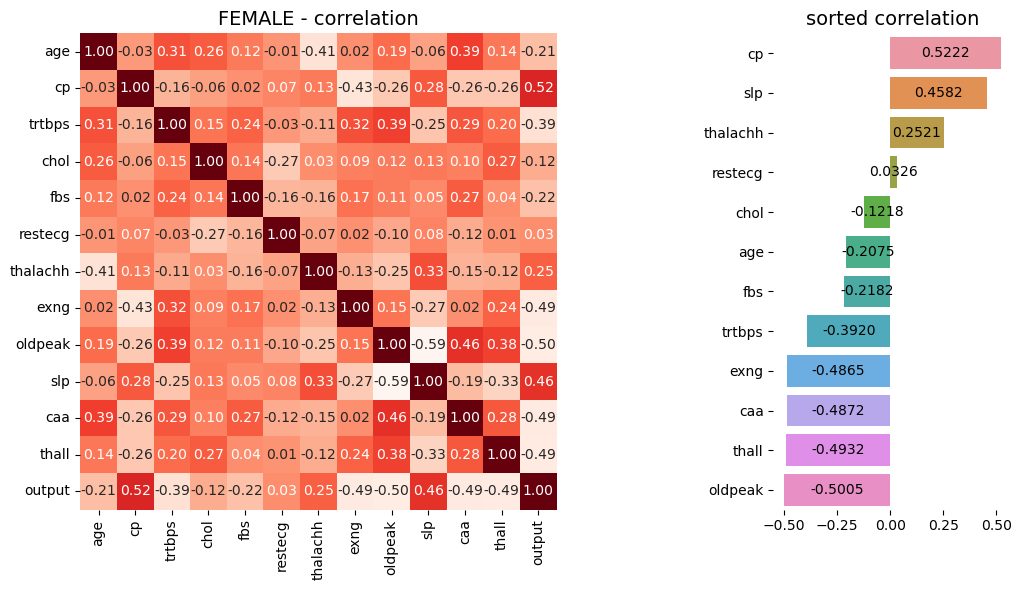

In [13]:
dataCorr_F = df[df['sex'] == 0].corr()
# drop 'sex' from row and column
dataCorr_F = dataCorr_F.drop(['sex'])
dataCorr_F = dataCorr_F.drop(['sex'], axis = 1)

#  Correlation TABLE
corrALL_F = dataCorr_F['output'].sort_values(ascending=False)
corrALL_F = corrALL_F.drop(['output'])


# heatmap and barplot
fig = plt.figure(figsize=(12,6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 

ax0 = plt.subplot(gs[0])
sns.heatmap(dataCorr_F, annot = True, fmt='.2f', square = True, cbar = False, ax = ax0, cmap = 'Reds')
plt.title('FEMALE - correlation', fontsize=14)

ax1 = plt.subplot(gs[1])
sns.barplot(y = corrALL_F.index, x = corrALL_F.values, ax = ax1)
plt.title('sorted correlation', fontsize = 14)
for p in ax1.patches:
    ax1.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width()/2, p.get_y()+.4), ha='center', va='center')
plt.box(False)

plt.tight_layout()
plt.show()

# **Female - correlation:**
- chest_pain_type and slope_peak_exercise_ST have strong correlation to heart disease
- resting_blood_pressure, exercise_induced_angina, thalium stress test and ST_depression have strong inverse correlation to heart disease

# [go to top of document](#top)     

---
#  4.  Machine Learning - Classification<a id="model"></a>
Machine learning is a subset of Artificial Intelligence (AI) and computer focuses on finding patterns and correlations in large dataset by using statistical algorithms.  The algorithms are trained to make the best decisions and predictions based on that analysis.

#  4.1  Train/Test Split <a id="model_split"></a>
Train/Test Split randomly splits a dataset into training and testing subsets.  The model learns on the training set based on known output, and the test data is used to evaluate the accuracy of the model.

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(['output'], axis = 1)
y = df['output']

split = 0.20  # 20% split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = split)
print ('Train set:  ', X_train.shape,  y_train.shape)
print ('Test set:   ', X_test.shape,  y_test.shape)

Train set:   (241, 13) (241,)
Test set:    (61, 13) (61,)


#  4.2  Define Classification Models <a id="model_algo"></a>
**Classification** is a *supervised* learning approach which attempts to learn the relationship between a set of feature variables and a target variable. The target attribute in classification is a categorical variable with discrete values.  Following classification algorithms will be evaluated:

-  **Decision Tree (DT)**
-  **Gaussian Naive Bayes (NB)**
-  **K-Nearest Neighbors (KNN)**
-  **Logistic Regression (LR)**
-  **Random Forest (RF)**
-  **Support Vector Machines (SVM)**

In [15]:
# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


models = []   #  list with models

models.append(('DT  ', DecisionTreeClassifier()))
models.append(('NB  ', GaussianNB()))
models.append(('KNN ', KNeighborsClassifier()))
models.append(('LR  ', LogisticRegression(solver='liblinear')))
models.append(('RF  ', RandomForestClassifier()))
models.append(('SVM ', SVC(gamma='auto')))

models.sort()
for i in models:
    print(i)

('DT  ', DecisionTreeClassifier())
('KNN ', KNeighborsClassifier())
('LR  ', LogisticRegression(solver='liblinear'))
('NB  ', GaussianNB())
('RF  ', RandomForestClassifier())
('SVM ', SVC(gamma='auto'))


 
#  5.  Classification Evaluation Metrics<a id="eval"></a>
Evaluation metrics help assess the performance of various Classifcation models/algorithms.

-  5.1 [Confusion Matrix](#eval_conf)<br>
-  5.2 [Accuracy Score](#eval_acc)<br>
-  5.3 [Recall and Precision Score](#eval_rp)<br>
-  5.4 [F1-Score](#eval_f1)<br>
-  5.5 [Receiver Operating Characteristics (ROC) Curve](#eval_roc)<br>
-  5.6 [Area Under the Curve (AUC) Score](#eval_auc)<br>
-  5.7 [Cross Validation Score](#eval_cv)<br>

Metrics will first be calculated and stored in `df_metrics` dataframe and then plotted.

#  Metrics Dataframe - `df_metrics`<a id="eval_df"></a>
Calculate and stores evaluation metrics in **`df_metrics`**.

1. import libraries and initalize lists
2. evaluate models, results in list
3. populate dataframe with the lists

---
**1. import libraries and initalize lists**

In [16]:
# Machine Learning Evaluation for Classification Models
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# create and initialize lists for dataframe
list_name, list_model = ([] for i in range(2))
list_CM, list_TN, list_FP, list_FN, list_TP = ([] for i in range(5))
list_AC, list_RC, list_PS, list_F1 = ([] for i in range(4))
list_CVS, list_AUC = ([] for i in range(2))

# 2. evaluate models, results in list

In [17]:
#  Evaluate the Models:
for name, model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    list_name.append(name)    # model names
    list_model.append(str(model).split("(")[0])
    
    # confusion matrix values
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[0][0]  # True Negative  (Top-Left Quadrant)
    FP = CM[0][1]  # False Positive (Top-Right Quadrant)
    FN = CM[1][0]  # False Negative (Bottom-Left Quadrant)
    TP = CM[1][1]  # True Positive  (Bottom-Right Quadrant)
    
    list_CM.append(CM)  # confusion_matrix
    list_TN.append(TN)  # True Negative  (Top-Left Quadrant)
    list_FP.append(FP)  # False Positive (Top-Right Quadrant)
    list_FN.append(FN)  # False Negative (Bottom-Left Quadrant)
    list_TP.append(TP)  # True Positive  (Bottom-Right Quadrant)
    
    list_AC.append(accuracy_score(y_test, y_pred))    # accuracy_score
    list_RC.append(recall_score(y_test, y_pred))      # recall
    list_PS.append(precision_score(y_test, y_pred))   # precision
    list_F1.append(f1_score(y_test, y_pred))          # F1 score
    list_CVS.append(cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy').mean())  # cross-validation score

    #  area under curve
    model.probability = True   # need for predict_proba to work
    model.fit(X_train,y_train)
    y_preda = model.predict_proba(X_test)
    y_preda = y_preda[:,1]   # positive values only
    list_AUC.append(roc_auc_score(y_test, y_preda))
    
    print('evalute metrics for:\t', name)

evalute metrics for:	 DT  
evalute metrics for:	 KNN 
evalute metrics for:	 LR  
evalute metrics for:	 NB  
evalute metrics for:	 RF  
evalute metrics for:	 SVM 


# 3. populate dataframe with the lists

In [18]:
#  fill out the model dataframe
df_metrics = pd.DataFrame()

df_metrics['name'] = list_name
df_metrics['model'] = list_model

df_metrics['ConfusionMatrix'] = list_CM
df_metrics['TN'] = list_TN
df_metrics['FP'] = list_FP
df_metrics['FN'] = list_FN
df_metrics['TP'] = list_TP

df_metrics['AccuracyScore'] = list_AC
df_metrics['Recall'] = list_RC
df_metrics['Precision'] = list_PS
df_metrics['F1Score'] = list_F1

df_metrics['AUC'] = list_AUC
df_metrics['CrossValidation'] = list_CVS

print(df_metrics)
print(df_metrics.columns)

   name                   model      ConfusionMatrix  TN  FP  FN  TP  \
0  DT    DecisionTreeClassifier   [[21, 9], [3, 28]]  21   9   3  28   
1  KNN     KNeighborsClassifier  [[15, 15], [9, 22]]  15  15   9  22   
2  LR        LogisticRegression   [[22, 8], [2, 29]]  22   8   2  29   
3  NB                GaussianNB   [[21, 9], [3, 28]]  21   9   3  28   
4  RF    RandomForestClassifier   [[22, 8], [3, 28]]  22   8   3  28   
5  SVM                      SVC   [[1, 29], [0, 31]]   1  29   0  31   

   AccuracyScore    Recall  Precision   F1Score       AUC  CrossValidation  
0       0.803279  0.903226   0.756757  0.823529  0.803226         0.763690  
1       0.606557  0.709677   0.594595  0.647059  0.654301         0.630527  
2       0.836066  0.935484   0.783784  0.852941  0.895699         0.846599  
3       0.803279  0.903226   0.756757  0.823529  0.879570         0.809099  
4       0.819672  0.903226   0.777778  0.835821  0.870968         0.809184  
5       0.524590  1.000000   0.51

#  5.1 Confusion Matrix<a id="eval_conf"></a>   
**Confusion matrix** is used to measure the performance of a classification model. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like **accuracy**, **precision**, **recall**, and **F1-score**.

**Confusion matrix** is N x N matrix, where N is the number of target classes.  A good model is one which has high TP and TN rates and low FP and FN rates.

   - **True Negative** – model predicted negative class correctly to be the negative class
   - **False Positive** – model predicted negative class incorrectly to be a positive class
   - **False Negative** – model predicted positive class incorrectly to be the negative class
   - **True Positive** – model predicted positive class correctly to be a positive class
   
Confusion matrixes are widely used because they give a better idea of a model’s performance than classification accuracy does.

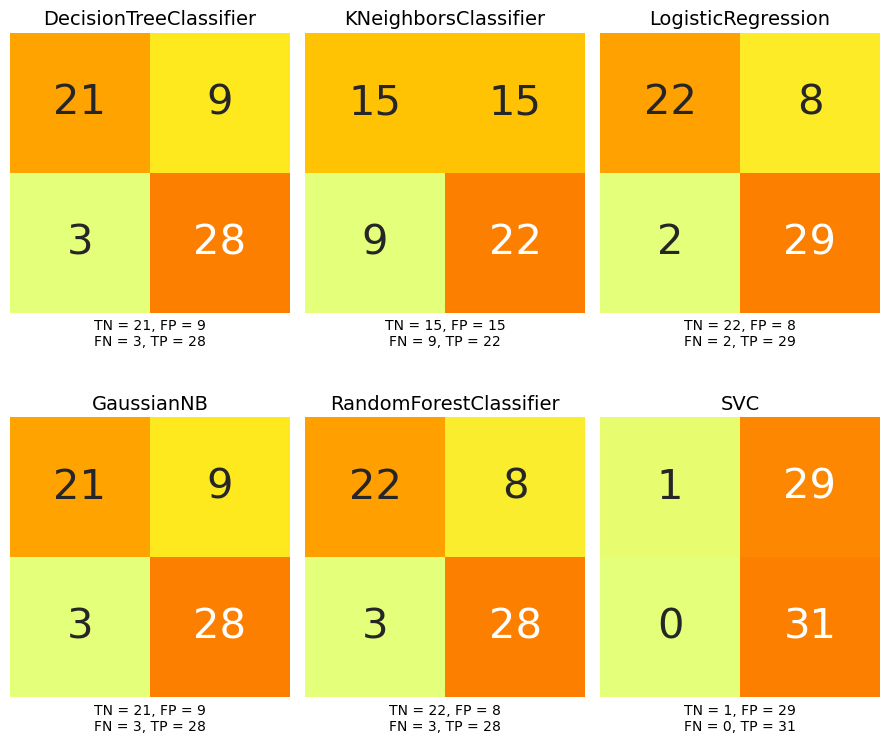

In [19]:
#  plot Confusion Matrix
a = 2  # subplot rows
b = 3  # subplot columns
c = 1  # subplot counter
fig = plt.figure(figsize=(9,8))

for i in range(len(df_metrics)):
    #  get values from dataframe
    mod_name  = df_metrics['model'].loc[i]
    conf_matx = df_metrics['ConfusionMatrix'].loc[i]

    # confusion matrix values
    TN = df_metrics['TN'].loc[i]  # True Negative (Top-Left Quadrant)
    FP = df_metrics['FP'].loc[i]  # False Positive (Top-Right Quadrant)
    FN = df_metrics['FN'].loc[i]  # False Negative (Bottom-Left Quadrant)
    TP = df_metrics['TP'].loc[i]  # True Positive (Bottom-Right Quadrant)
    
    # plot confusion matrix in dataframe
    plt.subplot(a, b, c)
    sns.heatmap(conf_matx, annot=True, cbar = False, annot_kws={"size": 30}, cmap = 'Wistia', square = True)
    plt.title(mod_name, fontsize = 14)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('TN = {}, FP = {}\nFN = {}, TP = {}'.format(TN,FP,FN,TP))
    c = c + 1

plt.tight_layout()
plt.show()

#  5.2 Accuracy Score<a id="eval_acc"></a>   
**Accuracy Score** function computes accuracy of a classifier is calculated as the ratio of the total number of correctly predicted samples by the total number of samples.

$$
\text{Accuracy Score} = \frac{TP+TN}{TP+TN+FP+FN}
$$

Accuracy metric works best with a balanced (unbiased) dataset and should not be used with unbalanced datasets.

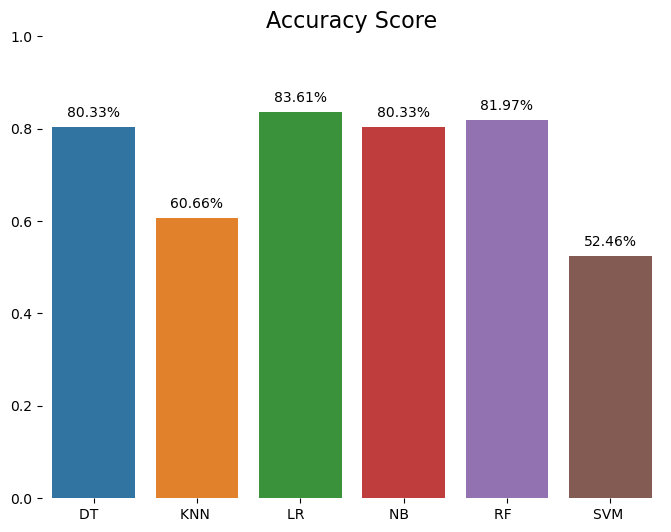

In [20]:
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(data = df_metrics, x = 'name', y = 'AccuracyScore')
plt.title('Accuracy Score', fontsize = 16)
plt.xlabel("")
plt.ylabel("")
plt.ylim([0,1])
plt.box(False)
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2, p.get_height()+0.03), ha='center', va='center')
plt.show()

#  5.3 Recall and Precision Score<a id="eval_rp"></a>   
**Recall (or sensitivity) Score** is the fraction of positives events that were predicted correctly, or the true positive rate:

$$
\text{Recall Score} = \frac{TP}{TP+FN}
$$


**Precision Score** is the fraction of predicted positives events that are actually positive and is a measure of the accuracy:

$$
\text{Recall Score} = \frac{TP}{TP+FP}
$$


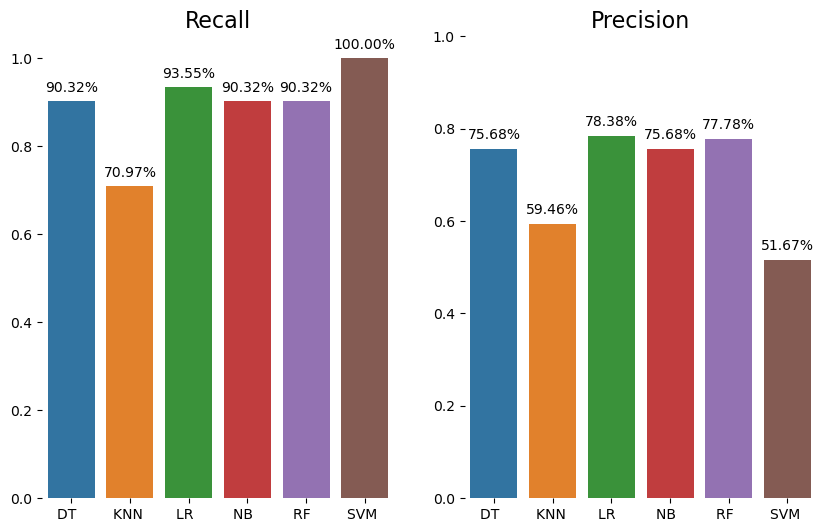

In [21]:
fig = plt.figure(figsize=(10,6))
plt.subplot(121)   # recall
ax = sns.barplot(data = df_metrics, x = 'name', y = 'Recall')
plt.title('Recall', fontsize = 16)
plt.xlabel("")
plt.ylabel("")
plt.box(False)
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2, p.get_height()+0.03), ha='center', va='center')

plt.subplot(122)   # precision
ax = sns.barplot(data = df_metrics, x = 'name', y = 'Precision')
plt.title('Precision', fontsize = 16)
plt.xlabel("")
plt.ylabel("")
plt.ylim([0,1])
plt.box(False)
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2, p.get_height()+0.03), ha='center', va='center')
plt.show()

#  5.4 F1-Score<a id="eval_f1"></a>   
**F1-Score** is the weighted average of Precision and Recall.

$$
\text{F1-Score} = \frac{2 \times (\text{precision} \times \text{recall})}{\text{precision} + \text{recall})}
$$

F1-Score of 1 is the best, with perfect precision and recall. 

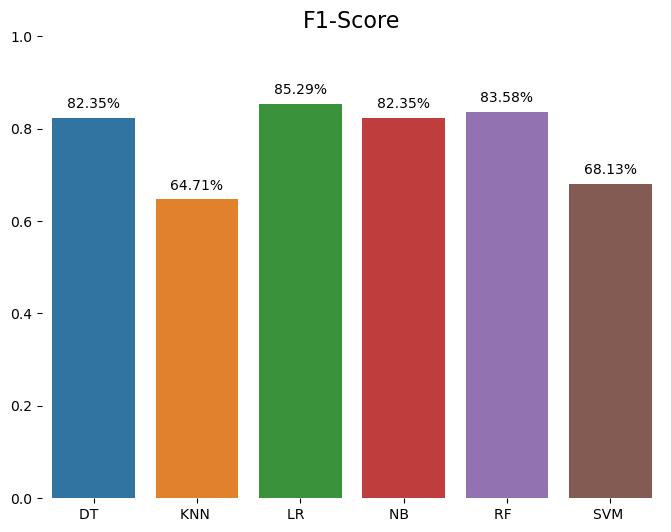

In [22]:
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(data = df_metrics, x = 'name', y = 'F1Score')
plt.title('F1-Score', fontsize = 16)
plt.xlabel("")
plt.ylabel("")
plt.ylim([0,1])
plt.box(False)
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2, p.get_height()+0.03), ha='center', va='center')
plt.show()

#  5.5 Receiver Operating Characteristics (ROC) Curve<a id="eval_roc"></a>   
**Receiver Operating Characteristic** (ROC) Curve is a model selection probability curve and plots the true positive rate against the false positive rate.  ROC plot provides:

-  relationship between sensitivity and specificity
-  accuracy: closer  graph is to  top and left-hand borders, the more accurate the test. 
-  accuracy: closer graph to diagonal, the less accurate the test. 
-  **perfect test** would go straight from zero up to top-left corner and then straight across the horizontal
-  **prefect chance** would follow the diagonal line and represent random outcome, i.e. flip of a coin
-  **useless test** is any ROC plot under the diagonal line

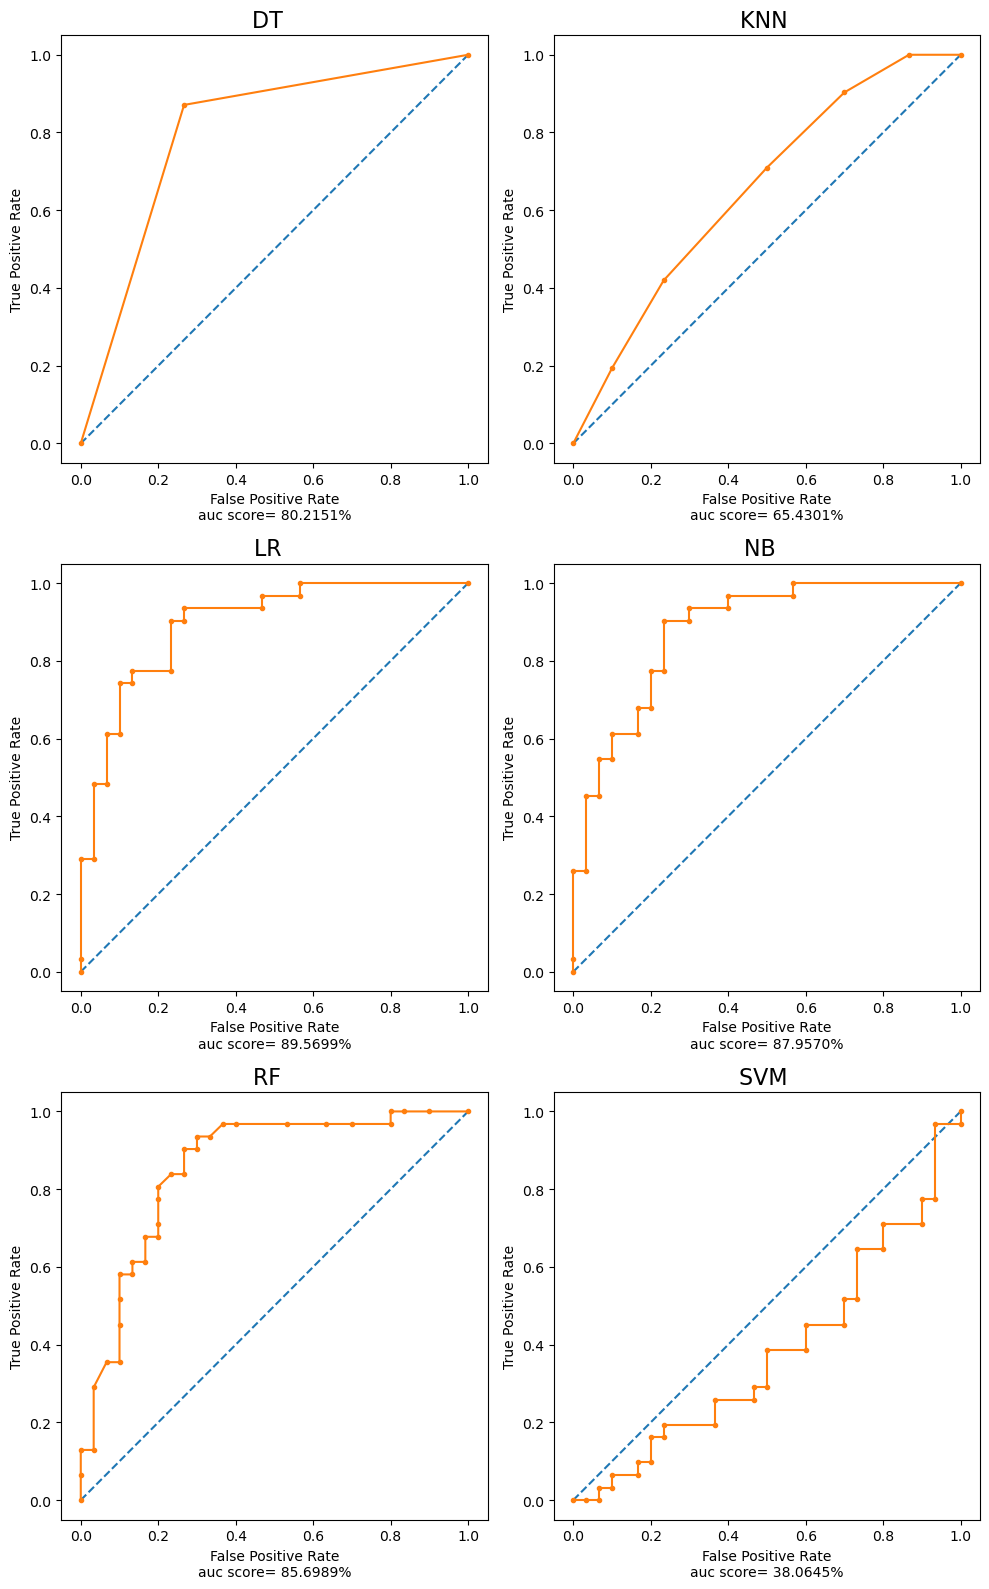

In [23]:
#  ROC plot
a = 3  # subplot rows
b = 2  # subplot columns
c = 1  # subplot counter
fig = plt.figure(figsize=(10,16))

for name, model in models:
    model.probability = True   # need for predict_proba to work
    model.fit(X_train,y_train)
    y_preda = model.predict_proba(X_test)
    y_preda = y_preda[:,1]   # positive values only

    AUC = roc_auc_score(y_test, y_preda)               # AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_preda)  # ROC

    #  plot ROC and AUC
    plt.subplot(a, b, c)
    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.title("{}".format(name), fontsize = 16)
    plt.xlabel('False Positive Rate\nauc score= {:3.4%}'.format(AUC))
    plt.ylabel('True Positive Rate')
    
    c = c + 1

plt.tight_layout()
plt.show()

#  5.6 Area Under the Curve (AUC) Score<a id="eval_auc"></a> 
**Area Under the Curve** (AUC) Score is the area under the ROC curve.  The greater the area under the curve, the more accurate the test.

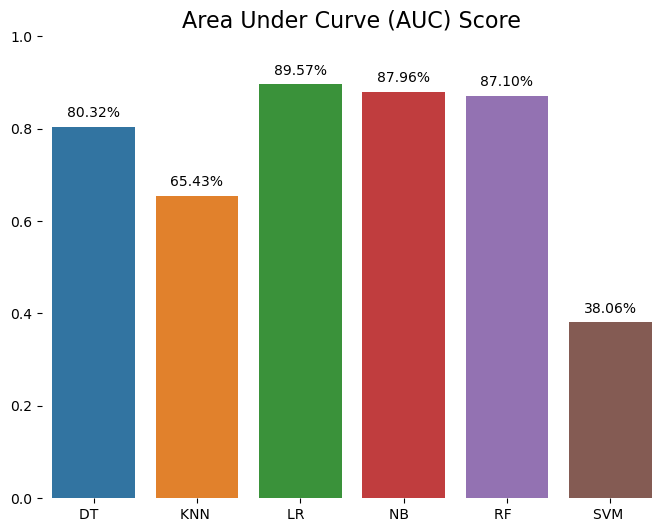

In [24]:
# plot
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(data = df_metrics, x = 'name', y = 'AUC')
plt.title('Area Under Curve (AUC) Score', fontsize = 16)
plt.xlabel("")
plt.ylabel("")
plt.ylim([0,1])
plt.box(False)
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2, p.get_height()+0.03), ha='center', va='center')
plt.show()

#  5.7 Cross Validation Score<a id="eval_cv"></a>   
**Cross Validation Score** estimates a model's performance on data not used in  training.  Cross Validation involves:

- partitioning the data (called **folds**)
- perform analysis on one subset (training set)
- validate analysis on other subset (testing set)
- repeat until all data has been used in both training and testing set

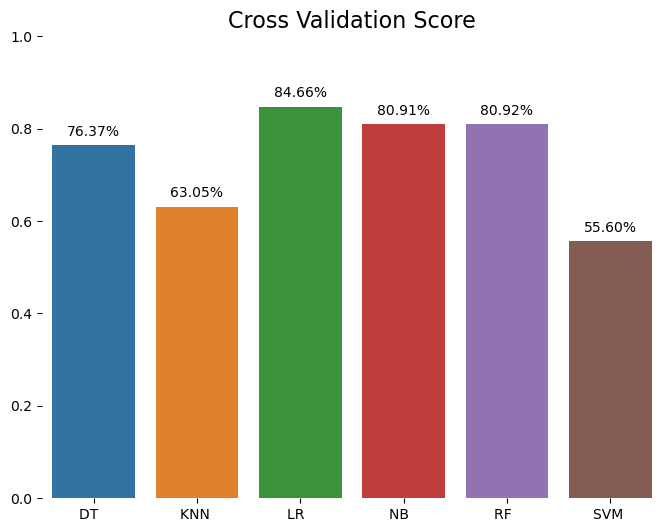

In [25]:
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(data = df_metrics, x = 'name', y = 'CrossValidation')
plt.title('Cross Validation Score', fontsize = 16)
plt.xlabel("")
plt.ylabel("")
plt.ylim([0,1])
plt.box(False)
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2, p.get_height()+0.03), ha='center', va='center')
plt.show()